# Akil Bhuiyan
### Quiz Assignment 1




## All Imports 

In [45]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## **Part 1: Data Summary**


About Data Set:

This dataset containing the prices and other attributes of almost 54,000 diamonds. A data frame is with 53940 rows and 10 attributes, those are carat, cut, color, clarity, depth, table, prince, x, y and z.

About Attributes: 

* price:
      price in US dollars (\$326--\$18,823)

* carat:
      weight of the diamond (0.2--5.01)

* cut:
      quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color:
      diamond colour, from D (best) to J (worst)

* clarity:
      a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x:
      length in mm (0--10.74)

* y:
      width in mm (0--58.9)

* z:
      depth in mm (0--31.8)

* depth:
      total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table:
      width of top of diamond relative to widest point (43--95)


After the analysis we can have a concrete idea of diamond business, diamond sales, prediction of future sales, quality of diamonds, factors where data set gives a conflict. Basically we can have a better prediction models using attributes. Since diamond pricing involves a complex mechanism influenced by multiple factors such as carat, cut, color, and price. I will analyze the correlation between these factors and depicts with visualizations.

### Read the csv file and retrieve the data and print them in a data table using pandas head method. 

In [170]:
csvv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRWhjqpntnS_SgnD41aHPS8thyPIO_t_AT1vf4SiHghvauBs_7Wj6ZrSDZzW9bSFOxpwI20RpsiNlez/pub?gid=539073258&single=true&output=csv'
csvv = 'https://raw.githubusercontent.com/iakil/CSCI381_DataScience/main/Quiz/Quiz1/diamonds.csv'
df = pd.read_csv(csvv)
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Getting All the attributes data types

In [21]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

## **Part 2: Exploratory Data Analysis (EDA)**

### Total number of Diamonds

In [101]:
df.count()[0]

53940

In [205]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Check If there is any null

In [32]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

This histogram shows the prices with the grid on. 

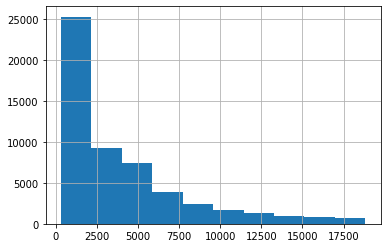

In [40]:
plt.hist(df.price) # Histogram
plt.grid (True)
plt.show()

value_count functions are implemented here for X axis. X here is means diamonds column. 

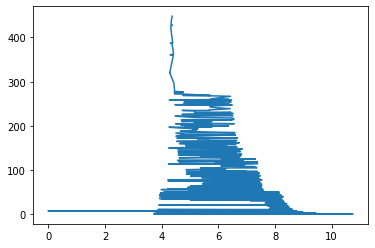

In [193]:
px = df['x'].value_counts()
plt.plot(px)

I actually used information on the variability or dispersion of the data. A boxplot is a graph that gives me a good indication of how the values in the data are spread out. Although boxplots may seem primitive in comparison to a histogram or density plot, they have the advantage of taking up less space, which is useful when comparing distributions between many groups or datasets.
Here it graph depth with grid on. 

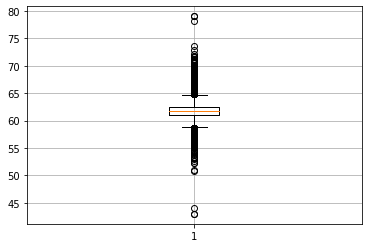

In [43]:
plt.boxplot(df.depth) # Box Plot
plt.grid (True)
plt.show()

My plotting diagram is a map of a diamond’s clarity characteristics. These are the blemishes that reside on a diamond’s surface and the inclusions which are internal characteristics. The diagram is an important part of the diamond grading report for colored diamonds. 

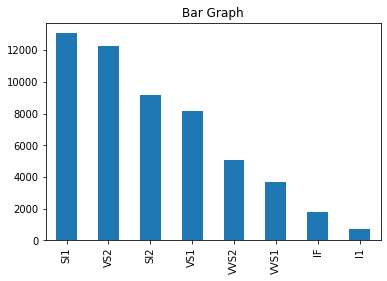

In [195]:
clarity = df["clarity"].value_counts()
clarity.plot( kind="bar", title = 'Bar Graph' )
plt.show()

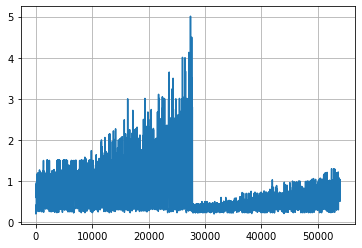

In [38]:
x = df.iloc[:,0]
y = df['carat'].tolist()
plt.plot(x,y)
plt.grid()

By plotting the categorical variables as color, we can see that these variables all show a relationship with Price. From here we could assume that these three variables would be important in predicting price, hence including them as features in our following prediction model.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


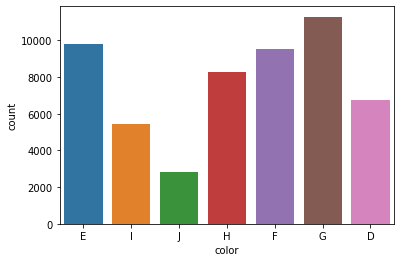

In [46]:
sns.countplot(df.color)
plt.show()

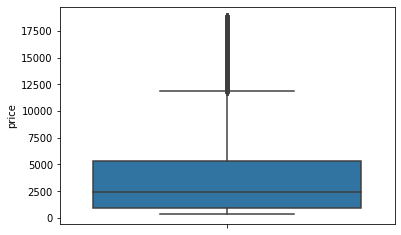

In [190]:
df = df[df['price'] <60000]
sns.boxplot(y=df['price'])

In order to predict diamond price, we would first try to fit the data with a linear regression model. Few assumptions are required before carrying out the analysis normality, independecy, homogeneity.

No handles with labels found to put in legend.


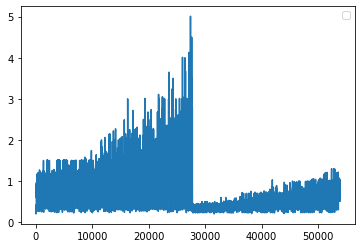

<Figure size 720x360 with 0 Axes>

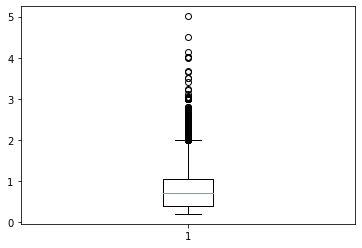

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


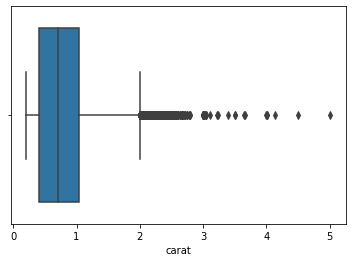

In [204]:
plt.plot(df['carat'])
plt.legend()
plt.figure(figsize=(10, 5))
plt.show()
plt.boxplot(df['carat'])
plt.show()
sns.boxplot(df['carat'])

The result shows that carat carries is the most important feature. In general, carat and cut hold a negative correlation if we see box-plot above, fair cuts are usually higher carat, ideal cuts are usually lower carat. This could be due to larger diamonds are rare also the technical challenge of cutting a large stone into an ideal cutting. This is also the reason why lower quality diamonds, if it is high carats, would be more expensive.

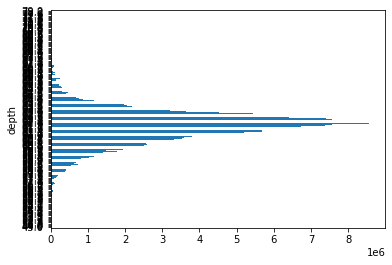

depth,43.0,44.0,50.8,51.0,52.2,52.3,52.7,53.0,53.1,53.2,...,71.0,71.2,71.3,71.6,71.8,72.2,72.9,73.6,78.2,79.0
price,,,,,,,,,,,,,,,,,,,,,
326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
df.groupby('depth').price.sum().plot(kind='barh')
plt.show()
pd.crosstab(df.price,df.depth)

We can also use a heatmap to visualise this information. Darker indicates higher count and white indicates low count.

From the heatmap, we can say that most ideal and premium cuts are from colour G.
Most very good and good cut diamonds are from colour E. Fair cut diamonds are usually from colour F, G, H. Overall, all cut group diamonds are rare in colour J.

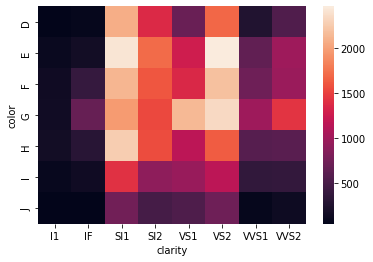

In [212]:
sns.heatmap(pd.crosstab(df.color,df.clarity))
plt.show()

## **Part 3: Inferences**

In [187]:
carat = df['carat']
x = df['x']
y = df['y']
cut = df['cut']
price = df["price"]

### Question 1:

What proportion of diamonds are between .30 and 1.08 carats?

> I used list comprehension to solve this question. whereever i found that diamonds are in between 0.30 to 1.08 carats, I list them. At the very end length of my list is total number of diamonds in between this carats. After that to find the proportion, I divide this result with the total number of diamond carats. 

In [106]:
res = [i for i in carat.tolist() if i > 0.30 and i <1.08]
res = (len(res)/len(carat.tolist()))
res

0.6939933259176864

### Question 2: 

How many of the diamonds have equal x and y dimensions?

> Used numpy where uumpy intersect1d function insersect 1d array and length of that list is where x and y dimensions are equal.

In [185]:
res = np.intersect1d(x.tolist(),y.tolist())
res = len(res)
res

521

### Question 3:

How many of the diamonds have a carat value that is less than the mean carat value?

> As same as question 1, I used list comprehension and iterate through and put those values in the list where mean of the carat is less than the carat and length of that list is the answer. 

In [85]:
res = [i for i in carat if i < carat.mean()]
res = len(res)
res

31127

### Question 4:

How many diamonds have a Premium cut or better? Note that the possible values for the quality of a
cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

> I have a list named chk means check. In the list comprehension, if the value in cut matches my chk values, which are premium or ideal. Based on that condition, I append values to the list and length of that list is my diamonds have a Premium cut or better.

In [128]:
chk = ['Premium' , 'Ideal']
res = [i for i in cut.tolist() if i in chk]
len (res)


35342

### Question 5:

Which diamond has the highest price per carat? What is its value?

> I copied price column object type values into a list, then i sort that list which gives me the highest value of diamond. To get the index I iterate and checked wheneven i get that value is my index. 

In [182]:
p = price.tolist()
res = [i for i in p]
res.sort()
ind = [i for i in range (len(p)) if p[i] ==res[-1]]
print(f"Index of {ind[0]} has highest price per carat $ {resInd[-1]}")

Index of 27749 has highest price per carat $ 18823


18823

### Question 6:

Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and
discuss any conclusions you can draw from the appearance of the boxplots.

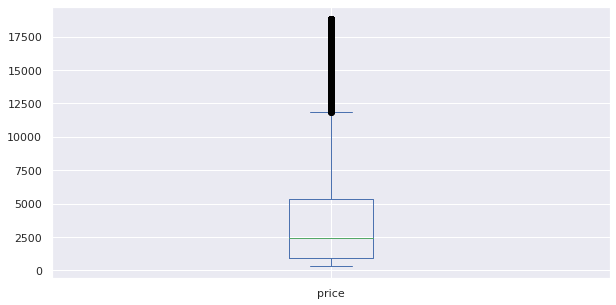

In [231]:
df[['cut', 'price']].plot(kind='box')

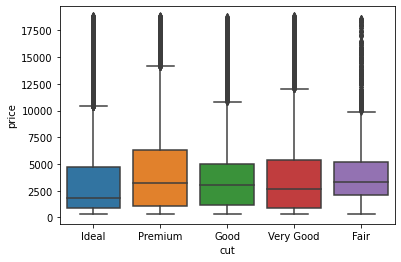

In [123]:
sns.boxplot (x="cut", y="price", data=df)

### Question 7:

Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the
relationship between those two attributes?

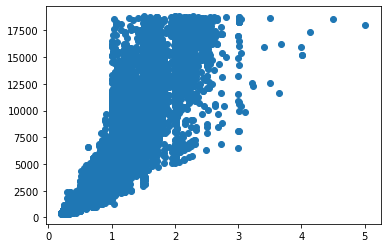

In [111]:
plt.scatter(x=carat,y=price)
plt.show()

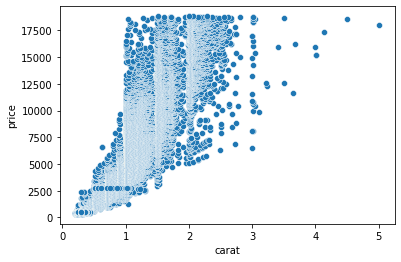

In [124]:
sns.scatterplot(x=carat,y=price, x_bins=30, y_bins=30, data=df)


## Part 4: Conclusion

In conclusion, we can visualize that in near future diamond carat will make an impact on it clarity, color, price, etc. My graphs gives an clear image of the diamonds prices and the quality. In this analysis, I can come up with an idea that 69 percent of diamonds are between 0.30-1.08, 35342 diamonds have a premiu cut or better, 18823 is the highest diamond price. Based on my visalization, i can portray dimension, ratio or percentage of diamonds.

## References
https://ggplot2.tidyverse.org/reference/diamonds.html

https://www.analyticsvidhya.com/blog/2022/02/exploratory-data-analysis-in-python/#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20in%20Python&text=EDA%20can%20be%20divided%20into,science%20or%20machine%20learning%20process. 

https://pandas.pydata.org/

https://stackoverflow.com/questions/33524694/plotting-with-seaborn 

https://www.statology.org/seaborn-stacked-bar-plot/ 

https://stackabuse.com/matplotlib-stack-plot-tutorial-and-examples/